# Assignment 3: Clustering Algorithm Self-Study 
## Topic: DBSCAN Algorithm 
### Goal: Algorithm comparisons: DBSCAN vs. k-Means and Hierarchical Clustering

### Import Libraries 

In [40]:
#------------------------------------------------------------------
# Data Manipulation 
#------------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#------------------------------------------------------------------
# Create Synthetic Datasets
#------------------------------------------------------------------
from sklearn.datasets import make_blobs, make_moons

#------------------------------------------------------------------
# Clustering Algorithms 
#------------------------------------------------------------------
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#------------------------------------------------------------------
# Evaluation 
#------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples
from sklearn.metrics import (
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    fowlkes_mallows_score, 
    homogeneity_score, 
    completeness_score,
    v_measure_score,
    adjusted_mutual_info_score,
    ) 

#------------------------------------------------------------------
# Vizualization
#------------------------------------------------------------------
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Generation
Use sklearn.datasets to create two datasets for comparison between algorithms. One dataset DBSCAN can excel and the other dataset DBSCAN struggles. 

In [41]:
#-------------------- Data where DBSCAN struggles -----------------------
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

#---------------------- Data where DBSCAN excels ------------------------
X_moons, y_moons = make_moons(n_samples=300, noise = 0.05) 

### Preprocessing

In [42]:
def scaled_data(X): 
    return StandardScaler().fit_transform(X)

X_blob_scaled = scaled_data(X_blobs)
X_moons_scaled = scaled_data(X_moons)

#===== plotting function =====
def plot_data(X, labels, title, centers = None):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6, label='Data points')
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.title(title)
    plt.legend()
    plt.show()

### k-Means Clustering 

======KMeansClustering on Blobs ======


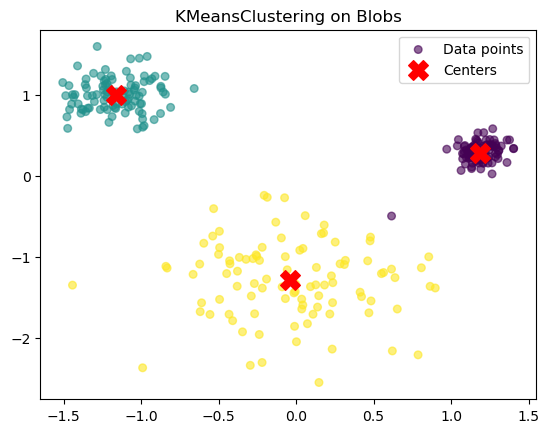

======KMeans Clustering on Moons ======


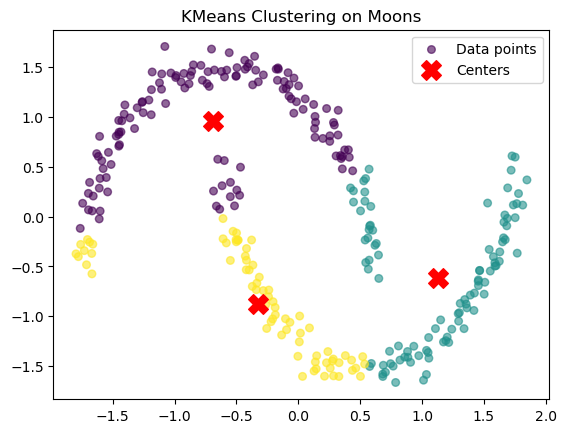

In [43]:
def run_kmeans(X, n_clusters=3, max_iter =5, random_state =42, title="KMeans Clustering"): 
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    labels = model.fit_predict(X)
    centers = model.cluster_centers_
    
    print(f"======{title} ======")
    plot_data(X, labels, title, centers)

    return labels

labels_kmeans_blobs = run_kmeans(X_blob_scaled, n_clusters= 3, max_iter=5, random_state=42,  title = "KMeansClustering on Blobs")
labels_kmeans_moons = run_kmeans(X_moons_scaled, n_clusters= 3, max_iter=5, random_state=42, title = "KMeans Clustering on Moons")

### Hierarchical Clustering 

======Hierarchical Clustering on Blobs======


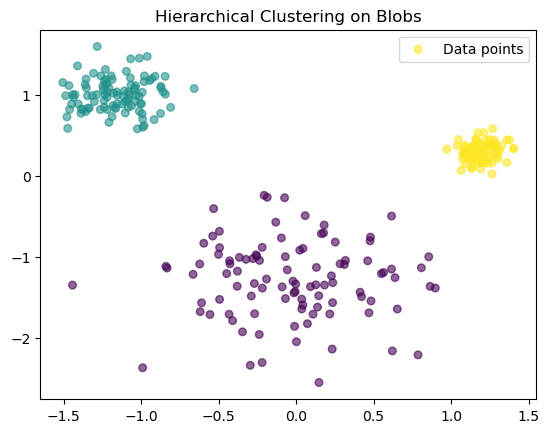

======Hierarchical Clustering on Moons======


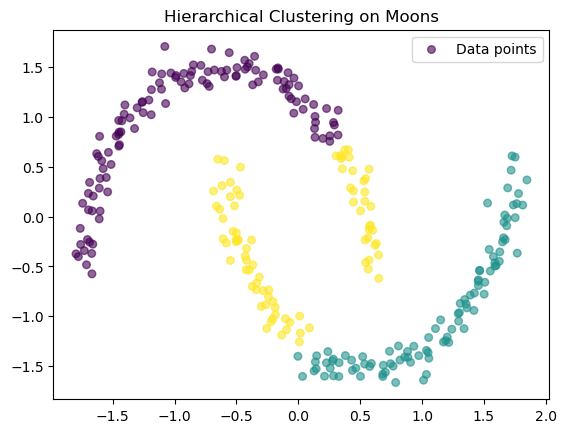

In [44]:
#Taken from lab 5 - 1.2 Hierarchical Clustering
def run_hierarchical(X, n_clusters = 3, title = "Hierarchical Clustering"):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)

    print(f"======{title}======")  
    plot_data(X, labels, title)
    
    return labels 

labels_hier_blobs = run_hierarchical(X_blob_scaled, n_clusters= 3, title = "Hierarchical Clustering on Blobs")
labels_hier_moons = run_hierarchical(X_moons_scaled, n_clusters= 3, title = "Hierarchical Clustering on Moons")

### DBSCAN Clustering 

======DBSCAN on Blobs======
Estimated number of cluster: 3
Estimated number of noise points: 9


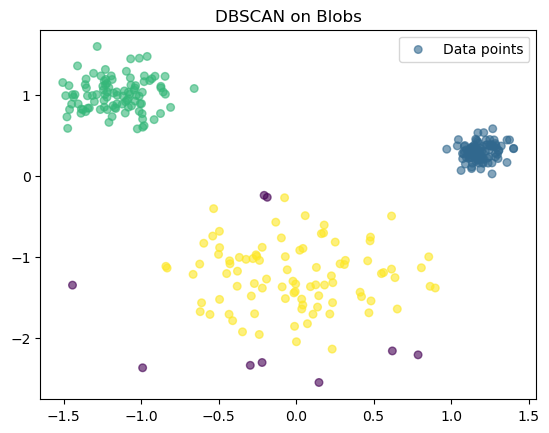

======DBSCAN on Moons======
Estimated number of cluster: 2
Estimated number of noise points: 0


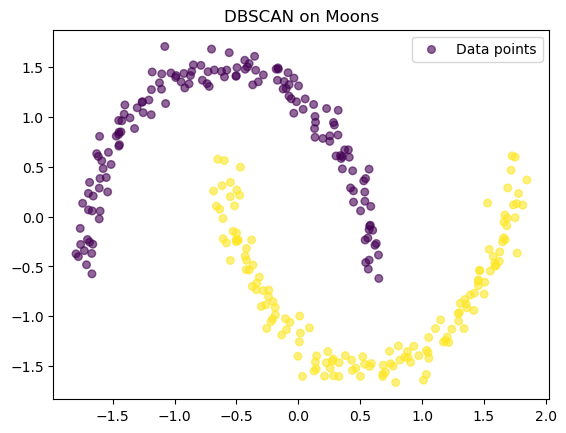

In [45]:
#Taken from https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/ and 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

def run_dbscan(X, eps = 0.3, min_samples = 5, title = "DBSCAN Clustering"): 
    model = DBSCAN(eps= eps, min_samples= min_samples)
    model.fit(X)
    labels = model.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #subtract 1 if -1(noise) is detected in labels to prevent noise being labeled
    n_noise = list(labels).count(-1) #how many points labeled as noise (noisy smaples are labelled -1) 

    print(f"======{title}======")  
    print(f"Estimated number of cluster: {n_clusters}")
    print(f"Estimated number of noise points: {n_noise}")

    plot_data(X, labels, title)
    
    return labels

###---- save predicted labels for evaluation 

labels_dbscan_blobs = run_dbscan(X_blob_scaled, eps = 0.3, min_samples= 5, title = "DBSCAN on Blobs")
labels_dbscan_moons = run_dbscan(X_moons_scaled, eps = 0.3, min_samples= 5, title = "DBSCAN on Moons")

### Visual Comparisons Results 

In [46]:
def evaluate_clustering(clusterDataTitle, X, labels, labels_true=None):
    print(f"\n--- {clusterDataTitle} ---")
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        print(f"Silhouette Score: {silhouette_score(X, labels):.3f}")
    else:
        print("Silhouette Score: Not applicable (only one cluster)")
    
    ###still need to add more evaluation metrics 
    print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
    print("NMI:", normalized_mutual_info_score(labels_true, labels))
    print("FMI:", fowlkes_mallows_score(labels_true, labels))

    print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
    print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
    print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
    print("Adjusted Mutual Information:" f" {adjusted_mutual_info_score(labels_true, labels):.3f}")



#### Blobs Data

In [47]:
evaluate_clustering("Kmeans Blobs", X_blobs, labels_kmeans_blobs, y_blobs)
evaluate_clustering("Hierarchical Blobs", X_blobs, labels_hier_blobs, y_blobs)
evaluate_clustering("DBSCAN Blobs", X_blobs, labels_dbscan_blobs, y_blobs)


--- Kmeans Blobs ---
Silhouette Score: 0.785
Adjusted Rand Index: 0.990
NMI: 0.9829929733076641
FMI: 0.9932998894556296
Homogeneity: 0.983
Completeness: 0.983
V-measure: 0.983
Adjusted Mutual Information: 0.983

--- Hierarchical Blobs ---
Silhouette Score: 0.786
Adjusted Rand Index: 1.000
NMI: 1.0
FMI: 1.0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Mutual Information: 1.000

--- DBSCAN Blobs ---
Silhouette Score: 0.717
Adjusted Rand Index: 0.958
NMI: 0.9561171251158624
FMI: 0.9720331706523625
Homogeneity: 1.000
Completeness: 0.916
V-measure: 0.956
Adjusted Mutual Information: 0.956


#### Moons Data

In [48]:
evaluate_clustering("Kmeans Moons", X_moons, labels_kmeans_moons, y_moons)
evaluate_clustering("Hierarchical Moons", X_moons, labels_hier_moons, y_moons)
evaluate_clustering("DBSCAN Moons", X_moons, labels_dbscan_moons, y_moons)


--- Kmeans Moons ---
Silhouette Score: 0.396
Adjusted Rand Index: 0.365
NMI: 0.32246667812096047
FMI: 0.6355389050582543
Homogeneity: 0.410
Completeness: 0.266
V-measure: 0.322
Adjusted Mutual Information: 0.320

--- Hierarchical Moons ---
Silhouette Score: 0.344
Adjusted Rand Index: 0.530
NMI: 0.5690883273694193
FMI: 0.73264749218128
Homogeneity: 0.732
Completeness: 0.466
V-measure: 0.569
Adjusted Mutual Information: 0.567

--- DBSCAN Moons ---
Silhouette Score: 0.328
Adjusted Rand Index: 1.000
NMI: 1.0
FMI: 1.0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Mutual Information: 1.000
